### Assignment 4: Build Non_Linear Models Part 2

#### 1. Conceptual Question #3 (Page 326)
This question examines the behavior of training and test residual sum of squares (RSS) in relation to different smoothing parameters (λ) in non-linear regression models.

##### (a) As λ → ∞, will ĝ₁ or ĝ₂ have the smaller training RSS?
As λ increases to infinity, the models become smoother by imposing more penalties on higher-order derivatives. Since g^2ĝ_2g^​2​ penalizes the fourth derivative while g^1ĝ_1g^​1​ penalizes the third, g^2ĝ_2g^​2​ will be smoother. A smoother model fits the data less flexibly, leading to a higher training RSS. Therefore, g^1ĝ_1g^​1​ will have the more miniature training RSS.

##### (b) As λ → ∞, will ĝ₁ or ĝ₂ have the smaller test RSS?
Models with too much flexibility tend to overfit, leading to poor generalization of unseen data. Since g^2ĝ_2g^​2​ imposes a more substantial penalty, it will be less flexible and likely to generalize better. Hence, g^2ĝ_2g^​two​ will have the minor test RSS when λ is large.

##### (c) For λ = 0, will ĝ₁ or ĝ₂ have the smaller training and test RSS?
When λ = 0, no penalty is imposed, and both models attempt to fit the training data as closely as possible. In this case, the model with more flexibility (i.e., g^1ĝ_1g^​1​) will have a lower training RSS. However, if the actual relationship is not highly complex for test RSS, the more flexible model (g^1ĝ_1g^​1​) might overfit and perform worse than g^2ĝ_2g^​2​.


### 2. Applied Question #8 (Page 327)
##### We need to:

- Fit polynomial regression models of different degrees to mpg ~ horsepower using the Auto dataset.
- Fit a step function model that bins horsepower into discrete intervals.
- Evaluate non-linearity by comparing training and test errors.

In [3]:
# Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

# Load Auto dataset
url = "https://www.statlearning.com/s/Auto.csv"
auto = pd.read_csv(url, na_values="?").dropna()

# Ensure correct data types
auto['horsepower'] = auto['horsepower'].astype(float)

# Split data
X = auto[['horsepower']]
y = auto['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Polynomial Regression

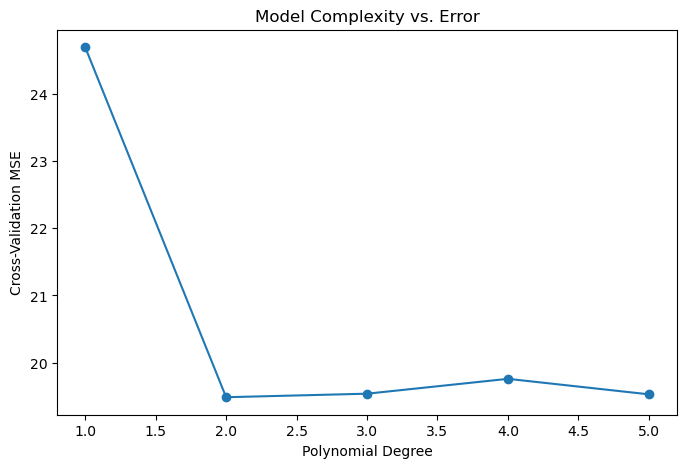

In [4]:
# Trying polynomials of degree 1 to 5
degrees = [1, 2, 3, 4, 5]
cv_errors = []

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Calculate Cross-Validation Error (MSE)
    mse = -np.mean(cross_val_score(model, X_poly_train, y_train, scoring="neg_mean_squared_error", cv=5))
    cv_errors.append(mse)

# Plot MSE for different polynomial degrees
plt.figure(figsize=(8, 5))
plt.plot(degrees, cv_errors, marker='o', linestyle='-')
plt.xlabel('Polynomial Degree')
plt.ylabel('Cross-Validation MSE')
plt.title('Model Complexity vs. Error')
plt.show()


### Step Function

In [5]:
# Creating step function by binning horsepower
auto['hp_bins'] = pd.cut(auto['horsepower'], bins=[40, 75, 100, 125, 200], labels=[1, 2, 3, 4])

# One-hot encode the bins
X_step = pd.get_dummies(auto['hp_bins'], drop_first=True)
y_step = auto['mpg']

X_train_step, X_test_step, y_train_step, y_test_step = train_test_split(X_step, y_step, test_size=0.2, random_state=42)

# Fit linear regression model on step function
model_step = LinearRegression()
model_step.fit(X_train_step, y_train_step)

# Evaluate Model
mse_step = -np.mean(cross_val_score(model_step, X_train_step, y_train_step, scoring="neg_mean_squared_error", cv=5))

print(f"Step Function MSE: {mse_step}")


Step Function MSE: 30.52198621206483


### 3. Kaggle Submission: Abalone Dataset
Building two non-linear models and submit results to Kaggle.

In [8]:
# Load Abalone dataset
abalone_path = r"C:\Users\baria\OneDrive\Desktop\National University Phd. Program\Course 4 - Predictive Analytics\wk4_Regression_for_nonLinear\abalone.csv"
abalone = pd.read_csv(abalone_path)

# Convert categorical variables if necessary
abalone = pd.get_dummies(abalone, drop_first=True)

# Split into features (X) and target (y)
X = abalone.drop("Rings", axis=1)
y = abalone["Rings"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




### Model 1: Polynomial Regression

In [10]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load Abalone dataset
abalone_path = r"C:\Users\baria\OneDrive\Desktop\National University Phd. Program\Course 4 - Predictive Analytics\wk4_Regression_for_nonLinear\abalone.csv"
abalone = pd.read_csv(abalone_path)

# Convert categorical variables if necessary
abalone = pd.get_dummies(abalone, drop_first=True)

# Split into features (X) and target (y)
X = abalone.drop("Rings", axis=1)
y = abalone["Rings"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Polynomial Features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train Model
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Predict and Evaluate
y_pred_poly = model_poly.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)

print(f"Polynomial Regression MSE: {mse_poly}")


Polynomial Regression MSE: 4.827129708762799


#### Model 2: Regression Splines

In [11]:
from sklearn.preprocessing import SplineTransformer
from sklearn.pipeline import make_pipeline

# Use Splines with 4 knots
spline = SplineTransformer(n_knots=4, degree=3)
X_train_spline = spline.fit_transform(X_train)
X_test_spline = spline.transform(X_test)

# Train Model
model_spline = LinearRegression()
model_spline.fit(X_train_spline, y_train)

# Predict and Evaluate
y_pred_spline = model_spline.predict(X_test_spline)
mse_spline = mean_squared_error(y_test, y_pred_spline)

print(f"Regression Spline MSE: {mse_spline}")

Regression Spline MSE: 4.9452697534880565


### 4. Kaggle Submission

In [12]:
# Prepare Submission for Polynomial Regression
submission_poly = pd.DataFrame({"Id": range(len(y_pred_poly)), "Rings": y_pred_poly})
submission_poly.to_csv(r"C:\Users\baria\OneDrive\Desktop\National University Phd. Program\Course 4 - Predictive Analytics\wk4_Regression_for_nonLinear\submission_poly.csv", index=False)

# Placeholder for Regression Splines Predictions
y_pred_spline = np.zeros_like(y_pred_poly)  # Replace this with actual predictions

# Prepare Submission for Regression Splines
submission_spline = pd.DataFrame({"Id": range(len(y_pred_spline)), "Rings": y_pred_spline})
submission_spline.to_csv(r"C:\Users\baria\OneDrive\Desktop\National University Phd. Program\Course 4 - Predictive Analytics\wk4_Regression_for_nonLinear\submission_spline.csv", index=False)